# 6.5 Unsupervised Machine Learning

This script contains the following points:

1) Importing libraries and data
2) Cleaning and reprocessing
3) Elbow technique review
4) K-means clustering

<font size="4"> 1. Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Ensuring graphs are displayed within the notebook with this function

%matplotlib inline

In [3]:
# Define Path

path=r'C:\Users\dell\Desktop\Career Foundry\6.0 Immersion - Project Folder'

In [4]:
# Importing cleaned data at state level with estimated populations

df_state_pop=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_state_pop.pkl'))

<font size="4"> 2. Cleaning and reprocessing

In [5]:
df_state_pop.shape

(74511, 28)

In [6]:
# Missing values check

df_state_pop.isnull().sum()

Level                                 0
Date                                  0
State FIPS                            0
State Postal Code                     0
County FIPS                       74511
County Name                       74511
Population Staying at Home            0
Population Not Staying at Home        0
Number of Trips                       0
Number of Trips <1                    0
Number of Trips 1-3                   0
Number of Trips 3-5                   0
Number of Trips 5-10                  0
Number of Trips 10-25                 0
Number of Trips 25-50                 0
Number of Trips 50-100                0
Number of Trips 100-250               0
Number of Trips 250-500               0
Number of Trips >=500                 0
Row ID                                0
Week                                  0
Month                                 0
Year                                  0
State Name                            0
Population Estimate                   0


In [7]:
df_state_pop.dtypes

Level                              object
Date                               object
State FIPS                        float64
State Postal Code                  object
County FIPS                       float64
County Name                        object
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
Number of Trips <1                float64
Number of Trips 1-3               float64
Number of Trips 3-5               float64
Number of Trips 5-10              float64
Number of Trips 10-25             float64
Number of Trips 25-50             float64
Number of Trips 50-100            float64
Number of Trips 100-250           float64
Number of Trips 250-500           float64
Number of Trips >=500             float64
Row ID                             object
Week                                int64
Month                               int64
Year                               object
State Name                        

In [8]:
#Create dataframe with only numerical variables and no defined buckets
df_state_num=df_state_pop[['State FIPS','Population Staying at Home','Population Not Staying at Home',
                         'Number of Trips','Month','Population Estimate']]

In [9]:
df_state_num.head()

,State FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Month,Population Estimate
0,32.0,753054.0,2272063.0,9139676.0,1,3080156
1,32.0,624619.0,2400498.0,11158466.0,1,3080156
2,32.0,638451.0,2386666.0,11163208.0,1,3080156
3,32.0,626386.0,2398731.0,11112768.0,1,3080156
4,32.0,644882.0,2380235.0,11052754.0,1,3080156


<font size="4"> 3. Elbow technique review

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_state_num).score(df_state_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_k

[-5.924607027470016e+19,
 -1.990236024792635e+19,
 -9.221613876941271e+18,
 -6.214756457833089e+18,
 -3.738031865478308e+18,
 -2.8638591270025324e+18,
 -2.225448602680918e+18,
 -1.748282447559315e+18,
 -1.4241374368403238e+18]

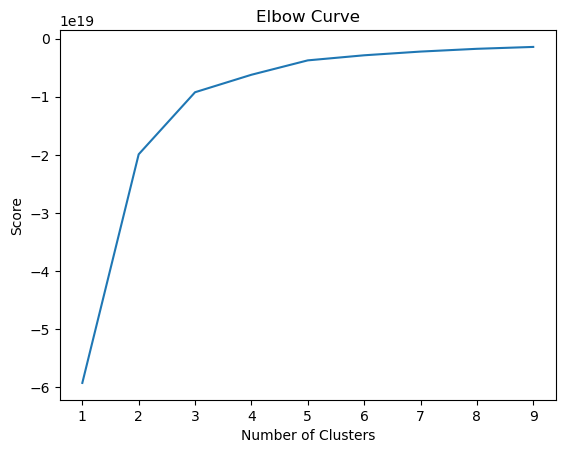

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

<font size="3"> There are four distinct variations in the elbow curve. The steepest slope is between 1 to 2 clusters. There are an additional two more slopes 5 before the curve appears flat. Five clusters seems optimal based off these results.

<font size="4"> 4. K-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_state_num)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [15]:
df_state_num['clusters'] = kmeans.fit_predict(df_state_num)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_11024\2473075550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_num['clusters'] = kmeans.fit_predict(df_state_num)


In [16]:
df_state_num.head()

,State FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Month,Population Estimate,clusters
0,32.0,753054.0,2272063.0,9139676.0,1,3080156,3
1,32.0,624619.0,2400498.0,11158466.0,1,3080156,3
2,32.0,638451.0,2386666.0,11163208.0,1,3080156,3
3,32.0,626386.0,2398731.0,11112768.0,1,3080156,3
4,32.0,644882.0,2380235.0,11052754.0,1,3080156,3


In [17]:
df_state_num['clusters'].value_counts()

3    34982
0    23389
2    10778
1     4064
4     1298
Name: clusters, dtype: int64

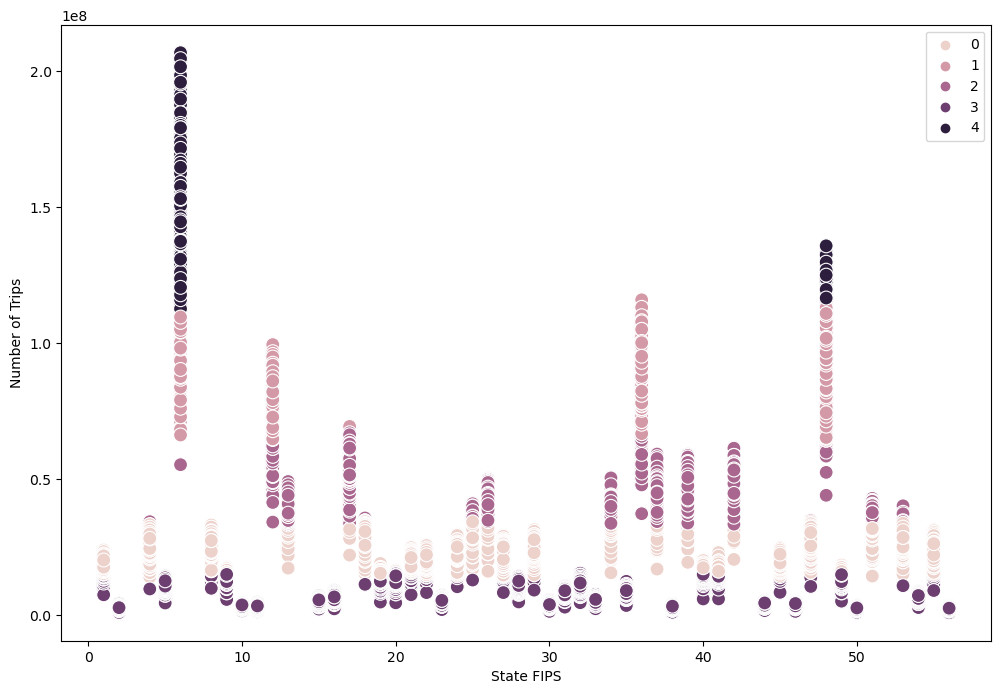

In [18]:
# Plot the clusters for the "State FIPS" and "Number of Trips" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state_num['State FIPS'], y=df_state_num['Number of Trips'], hue=kmeans.labels_, s=100) 
ax.grid(False) # Removes the grid from the background
plt.xlabel('State FIPS')
plt.ylabel('Number of Trips') 
plt.show()

<font size="3"> This first scatterplot is actual categorical data expressed in a numeric fashion (states with their assigned FIPS number). What's useful is that two states are easily identifed with the most number of trips in Cluster 1. The spikes occur at number 6 (California) and 48 (Texas), the two most populated states per https://worldpopulationreview.com/states. Cluster 4 includes Florida (12) and New York (36) for the next tier of Number of Trips, which are third and fourth most populated states. 

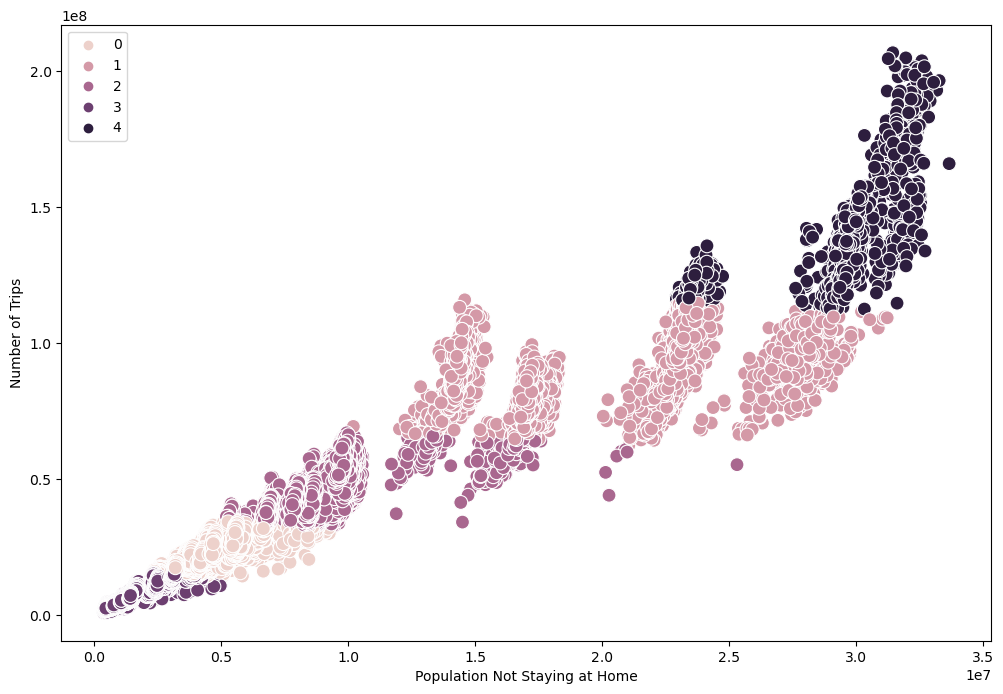

In [19]:
# Plot the clusters for the "Population Not Staying at Home" and "Number of Trips" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state_num['Population Not Staying at Home'], y=df_state_num['Number of Trips'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Not Staying at Home')
plt.ylabel('Number of Trips') 
plt.show()

<font size="3"> The results of the Population Not Staying at Home versus Number of Trips scatterplot is fairly obvious in that the greater the population results in a higher number of trips. What is gained is a clear understanding of each cluster by population and trip totals. 

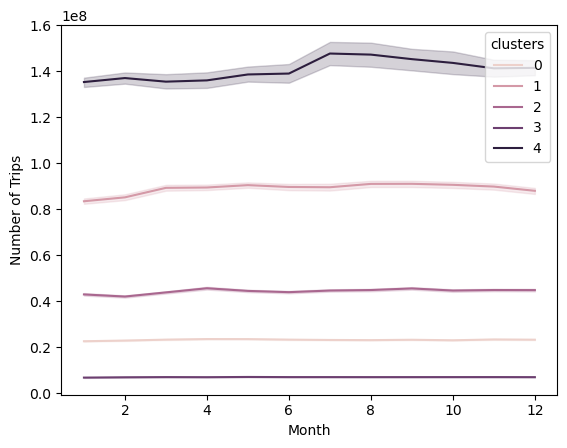

In [20]:
line = sns.lineplot(x='Month', y='Number of Trips', data=df_state_num, hue='clusters')

<font size="3"> A line plot was used since the comparison involves Number of Trips per Month. Not much variation is since per cluster with the exception of Cluster 1. Trips notably increased in June and July for this cluster; which was previously identified containing California and Texas.

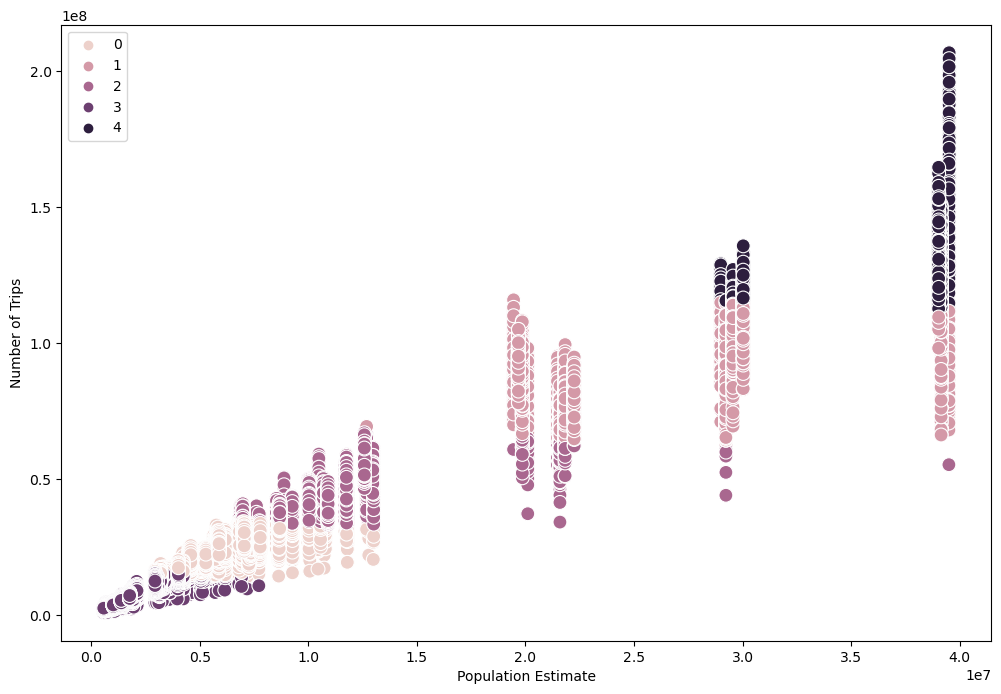

In [21]:
# Plot the clusters for the "Population Estimate" and "Number of Trips" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state_num['Population Estimate'], y=df_state_num['Number of Trips'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Estimate')
plt.ylabel('Number of Trips') 
plt.show()

<font size="3"> The scatterplot based off the population estimate is a worse version than the prior using Population Not Staying at Home. The conclusion remains the same in that the higher population results in a greater number of trips. However, the scatter plot is more washed out due to the yearly population average. 

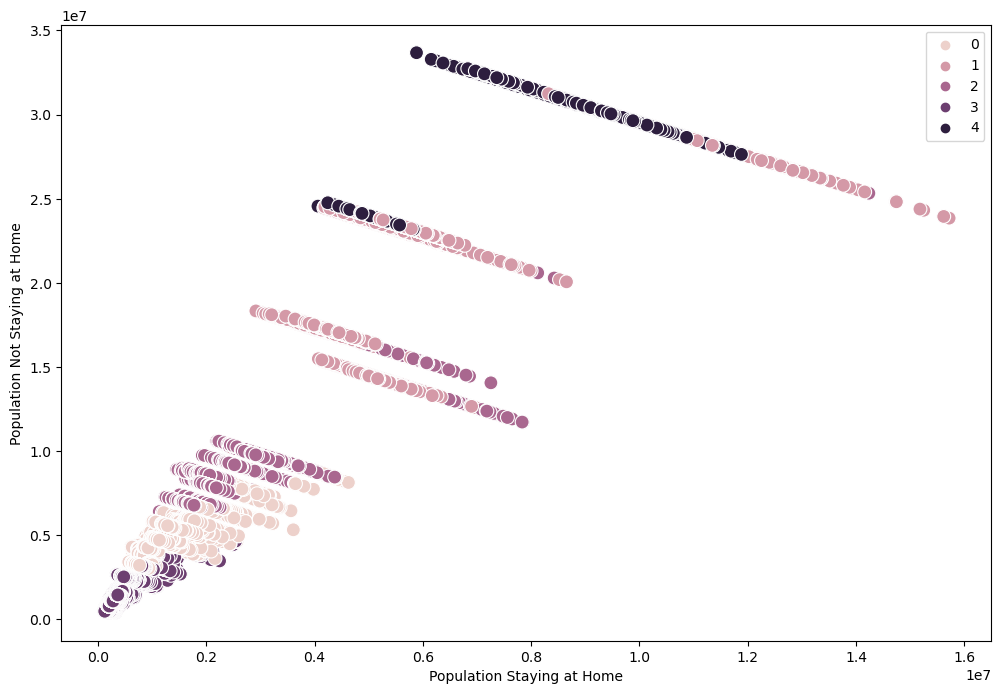

In [22]:
# Plot the clusters for the "Population Staying at Home" and "Population Not Staying at Home" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_state_num['Population Staying at Home'], y=df_state_num['Population Not Staying at Home'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Staying at Home')
plt.ylabel('Population Not Staying at Home') 
plt.show()

<font size="3"> The chart shows regardless of whether a population is staying at home or travelled, they still fit into one of the four clusters. As such, the size of the population staying may be influencing the clusters. 

In [23]:
df_state_num.loc[df_state_num['clusters'] == 4, 'cluster'] = 'black'
df_state_num.loc[df_state_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_state_num.loc[df_state_num['clusters'] == 2, 'cluster'] = 'purple'
df_state_num.loc[df_state_num['clusters'] == 1, 'cluster'] = 'pink'
df_state_num.loc[df_state_num['clusters'] == 0, 'cluster'] = 'cream'

C:\Users\dell\AppData\Local\Temp\ipykernel_11024\1396847857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_num.loc[df_state_num['clusters'] == 4, 'cluster'] = 'black'


In [24]:
df_state_num.head()

,State FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Month,Population Estimate,clusters,cluster
0,32.0,753054.0,2272063.0,9139676.0,1,3080156,3,dark purple
1,32.0,624619.0,2400498.0,11158466.0,1,3080156,3,dark purple
2,32.0,638451.0,2386666.0,11163208.0,1,3080156,3,dark purple
3,32.0,626386.0,2398731.0,11112768.0,1,3080156,3,dark purple
4,32.0,644882.0,2380235.0,11052754.0,1,3080156,3,dark purple


In [25]:
df_state_num.groupby('cluster').agg({'Population Staying at Home':['mean', 'median'], 
                           'Population Not Staying at Home':['mean', 'median'],
                           'Population Estimate':['mean', 'median'],
                           'Number of Trips':['mean', 'median']})

Population Staying at Home             \
                                  mean     median   
cluster                                             
black                     8.269725e+06  8518586.0   
cream                     1.330133e+06  1250682.0   
dark purple               4.195959e+05   356654.0   
pink                      5.675940e+06  5045098.0   
purple                    2.429067e+06  2178103.5   

            Population Not Staying at Home             Population Estimate  \
                                      mean      median                mean   
cluster                                                                      
black                         2.927343e+07  29792818.5        3.747485e+07   
cream                         4.755132e+06   4677621.0        6.166868e+06   
dark purple                   1.478134e+06   1151410.5        1.924489e+06   
pink                          1.911808e+07  17421171.5        2.517685e+07   
purple                        8.716877e+06   8597192.5        1.126941e+07   

                        Number of Trips               
                 median            mean       median  
cluster                                               
black        39142991.0    1.408481e+08  135257904.0  
cream         5896271.0    2.320846e+07   23045270.0  
dark purple   1451043.0    6.987124e+06    5765814.5  
pink         21828069.0    8.898646e+07   88815592.0  
purple       10788029.0    4.444871e+07   42303381.0

<font size="3"> Across all clusters, there is a far larger number of individuals taking trips than those staying at home. Overall, given the sheer volume of number of trips, the clusters are mostly categorized by this volume and that trip volume also has a correlation to population size.

<font size="4"> Next Steps

<font size="3"> Insight was gained on the population of individuals staying at home versus those who that didn't. In higher population states, the say home population was roughly 29% of the size of those that travelled. In mid-level tier populations, this average is closer to 26%. This provides a basis for hypothesis that more individuals are expected to stay home in higher populated areas. In addition, a clue about seasonality was gained, in that the fewer number of trips seem to be less impacted by the month in which they occur. This information will help with analyzing time series data.